In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    message : str

def greeting_node(state: AgentState) -> AgentState:
    """ Simple node that adds a greeting message to the state"""
    state['message'] ="Hey " + state['message'] + ", how is your day going?"
    return state

def uppercase_node(state: AgentState) -> AgentState:
    """ Simple node to convert message to uppercase """
    state['message'] = state['message'].upper()  # Fix 1: It's .upper() method
    return state

In [4]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.add_node("upper", uppercase_node)
graph.add_edge("greeter", "upper")
graph.set_entry_point("greeter")
graph.set_finish_point("upper")

app = graph.compile()

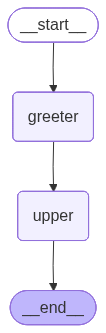

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({"message": "Hash"})

In [7]:
result["message"]

'HEY HASH, HOW IS YOUR DAY GOING?'

In [8]:
class AgentState2(TypedDict):
    name : str

def compliment_node(state:AgentState2)-> AgentState2:
    state['name'] = state['name'] + ", you're doing an amazing job learning LangGraph!"
    return state


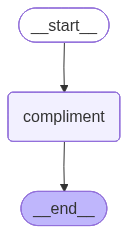

In [10]:
graph2 = StateGraph(AgentState2)

graph2.add_node("compliment", compliment_node)

graph2.set_entry_point("compliment")
graph2.set_finish_point("compliment")

graph2.compile()